In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Eigendecomposition

**Eigendecomposition** is a special type of *matrix decomposition*.  

Decomposing a matrix means expressing it as a product of several matrices whose multiplication reconstructs the original matrix. In the case of **eigendecomposition**, we express the original square matrix $A$ using its **eigenvectors** and **eigenvalues**.

Mathematically, the decomposition can be written as:

$$
A = V \Lambda V^{-1}
$$

where:  
- $V$ is the matrix whose **columns are the eigenvectors** $\boldsymbol{v}_1, \boldsymbol{v}_2, \dots, \boldsymbol{v}_n$ of $A$,  
- $\Lambda$ (lambda) is a **diagonal matrix** containing the **eigenvalues** $\lambda_1, \lambda_2, \dots, \lambda_n$ of $A$, and  
- $V^{-1}$ is the **inverse** of $V$.

In this exercise, you will verify that the eigenvectors and eigenvalues you have computed indeed reconstruct the original matrix when combined according to the formula above.

Your task is to rewrite he formula for A from above, while using a function from the `np.linalg` module to find the inverse of `V`.

In [4]:
A = np.array([[5, 1], [3, 3]])
V = np.array([[1, 1], [1, -3]])
V_1 = np.linalg.inv(V)
lamb = np.diag([6, 2])

print(f"Original matrix:\n{A}")
print(f"Composed matrix:\n{(V @ lamb) @ V_1}")


Original matrix:
[[5 1]
 [3 3]]
Composed matrix:
[[5. 1.]
 [3. 3.]]


### Eigendecomposition of Symmetric Matrices

For **symmetric matrices**, the eigendecomposition can be expressed as:

$$
A = Q \Lambda Q^T
$$

where $\Lambda$ is a **diagonal matrix** containing all the eigenvalues $\lambda_1, \lambda_2, \dots, \lambda_n$.  
In this case, the inverse of $Q$ is not needed, because $Q$ is an **orthogonal matrix**, meaning that:

$$
Q^{-1} = Q^T
$$

The columns of $Q$ are the **orthonormal eigenvectors** $\boldsymbol{q}_1, \boldsymbol{q}_2, \dots, \boldsymbol{q}_n$ of $A$.  
This property makes computations more efficient and numerically stable.


In [5]:
A = np.array([[6, 2, 1, 4], [2, 3, 2, 1], [1, 2, 2, 5], [4, 1 ,5, 1]])
print(f"Original matrix:\n{A}")
eigVals, eigVecs = np.linalg.eig(A)
eigVals = np.diag(eigVals)
A_comp = eigVecs @ eigVals @ eigVecs.T
print(f"Composed matrix:\n{A_comp}")

Original matrix:
[[6 2 1 4]
 [2 3 2 1]
 [1 2 2 5]
 [4 1 5 1]]
Composed matrix:
[[6. 2. 1. 4.]
 [2. 3. 2. 1.]
 [1. 2. 2. 5.]
 [4. 1. 5. 1.]]


# Singular Value Decomposition

A matrix $A$ can be decomposed into three matrices $U D V^T$ using **eigenvectors** and **eigenvalues**.  
If we take the **Gram matrix** of $A$, defined as $B = A^T A$, its eigenvalues are real and nonnegative.

The matrices $U$, $D$, and $V$ have the following properties:

* $U$ and $V$ are **orthogonal matrices**, meaning that $U^T = U^{-1}$ and $V^T = V^{-1}$
* $D$ is a **diagonal matrix** (all zeros except on the diagonal), but it is **not necessarily square**

The decomposition can be written as:

$$
A = U D V^T
$$

where:  
- the **columns of** $U = [\boldsymbol{u}_1, \boldsymbol{u}_2, \dots, \boldsymbol{u}_m]$ are the **left-singular vectors** of $A$,  
- the **columns of** $V = [\boldsymbol{v}_1, \boldsymbol{v}_2, \dots, \boldsymbol{v}_n]$ are the **right-singular vectors** of $A$, and  
- the **diagonal elements of** $D$ are the **singular values** $\sigma_1, \sigma_2, \dots$ of $A$.


In [ ]:
A = np.array([[1, 3, 5], [1, -3, 3],[4,1,-2], [1, 4, 1]],dtype = float)
#A = np.array([[1, 3, 5, -1], [1, -3, 3, 2],[4,1,-2, 1], [1, 4, 2, -5], [-3, 2, 0, 1]],dtype = float)
val, U = np.linalg.eig(A @ A.T)
val2, V = np.linalg.eig(A.T @ A)
D = np.diag(V)
print(A)
print((U @ D) @ V.T)

[[ 1.  3.  5.]
 [ 1. -3.  3.]
 [ 4.  1. -2.]
 [ 1.  4.  1.]]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)

To perform the SVD, we call the function `np.linalg.svd`. Note that `numpy` returns `D` as a vector, not as a diagonal matrix. Remember, that `numpy` returns matrix `V` transposed.  

In [19]:
U, D, Vt = np.linalg.svd(A)

S = np.zeros_like(A, dtype=float)
np.fill_diagonal(S, D)

print(f"U:\n{U}")
print(f"D:\n{D}")
print(f"V^T:\n{Vt}")

print(A)
print(U @ S @ Vt)

U:
[[ 0.85082301  0.20440877 -0.04491722 -0.48197479]
 [ 0.06293927  0.64299666 -0.62241279  0.44181022]
 [ 0.01027764 -0.62107122 -0.76411566 -0.17404645]
 [ 0.52156804 -0.39880182  0.16343815  0.73635037]]
D:
[6.82025434 5.56925467 3.93287849]
V^T:
[[ 0.21647886  0.65396403  0.72489168]
 [-0.36552131 -0.63420374  0.68130741]
 [-0.90527956  0.41245201 -0.10174609]]
[[ 1.  3.  5.]
 [ 1. -3.  3.]
 [ 4.  1. -2.]
 [ 1.  4.  1.]]
[[ 1.  3.  5.]
 [ 1. -3.  3.]
 [ 4.  1. -2.]
 [ 1.  4.  1.]]


Now, we will implement our own **Singular Value Decomposition (SVD)** using **eigenvectors** and **eigenvalues**.

First, we calculate the matrices:

$$
AA^T \quad \text{and} \quad A^T A
$$

Both of these matrices are **symmetric**, which means they can be **eigendecomposed** as:

$$
AA^T = U \Lambda_U U^T
$$
$$
A^T A = V \Lambda_V V^T
$$

where $\Lambda_U$ and $\Lambda_V$ are diagonal matrices containing the eigenvalues, and $U$ and $V$ contain the corresponding eigenvectors.

The **singular values** of $A$ are the **square roots** of the eigenvalues of $A^T A$ (or equivalently $AA^T$).  
These are then placed along the diagonal of the matrix $D$:

$$
D = \operatorname{diag}(\sqrt{\lambda_1}, \sqrt{\lambda_2}, \dots)
$$


In [27]:
AAT = A @ A.T
print(f'A A^T:\n {AAT}')
ATA = A.T @ A
print(f'A^T A :\n {ATA}')

A A^T:
 [[35.  7. -3. 18.]
 [ 7. 19. -5. -8.]
 [-3. -5. 21.  6.]
 [18. -8.  6. 18.]]
A^T A :
 [[19.  8.  1.]
 [ 8. 35.  8.]
 [ 1.  8. 39.]]


To perform the **Singular Value Decomposition (SVD)** manually, follow these steps:

*   Compute the eigenvectors of $AA^T$ and place them as **columns of** $U$
*   Compute the eigenvectors of $A^T A$ and place them as **columns of** $V$ — *this is your task*
*   Set all **eigenvalues smaller than 0** to **0** (to avoid numerical errors caused by floating-point precision)


In [ ]:
eigv_U, U_e = np.linalg.eigh(AAT)
eigv_U = np.maximum(eigv_U, 0)
print(eigv_U)

eigv_V, V_e =  np.linalg.eigh(ATA)
eigv_V = np.maximum(eigv_V, 0)
print(eigv_V)

[5.32907052e-15 1.54675332e+01 3.10165975e+01 4.65158693e+01]
[15.46753319 31.01659753 46.51586928]


To obtain the matrix $D$ in the same way as `np.linalg.svd`, we need to **sort the eigenvalues in descending order** and then take the **square root** of each eigenvalue to get the **singular values**.

In the same order, we must also **reorder the columns** of matrices $U$ and $V$ so that each singular value $\sigma_i$ corresponds to the correct pair of singular vectors $\boldsymbol{u}_i$ and $\boldsymbol{v}_i$.

This ensures that the columns are ordered by the **amount of information (variance)** they represent.

---

Your **task**:  
Reorder the columns of $U$ and $V$ according to the order of the singular values (from largest to smallest).


In [29]:
eig_val_order_V = np.argsort(eigv_V)[::-1]

m, n = A.shape
Sigma = np.zeros((m, n), dtype=float)
np.fill_diagonal(Sigma, np.sqrt(eigv_V[eig_val_order_V]))

eig_val_order_U = np.argsort(eigv_U)[::-1]

V_e = V_e[:, eig_val_order_V]
U_e = U_e[:, eig_val_order_U]

print(f"U found by SVD by eigendecomposition:\n{U_e}")
print(f"U found by numpy.linalg.svd:\n{U}")
print(f"\nD found by SVD by eigendecomposition:\n{Sigma}")
print(f"D found by numpy.linalg.svd:\n{D}")
print(f"\nV found by SVD by eigendecomposition:\n{V_e.T}")
print(f"V found by numpy.linalg.svd:\n{Vt}")

U found by SVD by eigendecomposition:
[[-0.85082301  0.20440877 -0.04491722 -0.48197479]
 [-0.06293927  0.64299666 -0.62241279  0.44181022]
 [-0.01027764 -0.62107122 -0.76411566 -0.17404645]
 [-0.52156804 -0.39880182  0.16343815  0.73635037]]
U found by numpy.linalg.svd:
[[ 0.85082301  0.20440877 -0.04491722 -0.48197479]
 [ 0.06293927  0.64299666 -0.62241279  0.44181022]
 [ 0.01027764 -0.62107122 -0.76411566 -0.17404645]
 [ 0.52156804 -0.39880182  0.16343815  0.73635037]]

D found by SVD by eigendecomposition:
[[6.82025434 0.         0.        ]
 [0.         5.56925467 0.        ]
 [0.         0.         3.93287849]
 [0.         0.         0.        ]]
D found by numpy.linalg.svd:
[6.82025434 5.56925467 3.93287849]

V found by SVD by eigendecomposition:
[[ 0.21647886  0.65396403  0.72489168]
 [ 0.36552131  0.63420374 -0.68130741]
 [ 0.90527956 -0.41245201  0.10174609]]
V found by numpy.linalg.svd:
[[ 0.21647886  0.65396403  0.72489168]
 [-0.36552131 -0.63420374  0.68130741]
 [-0.905279

Next, we compare the decomposition results.  

You may notice that some **columns of the matrices have flipped signs** compared to the decomposition obtained from `np.linalg.svd`.  
This happens because the eigenvectors of $A^T A$ and $A A^T$ can differ by a sign — both $\boldsymbol{v}$ and $-\boldsymbol{v}$ are valid eigenvectors.

To align the results, one possible solution is to compute each column of $U$ using the formula:

$$
\boldsymbol{u}_i = \frac{A \boldsymbol{v}_i}{\sigma_i}
$$

which follows from the relationship:

$$
A V = U \Sigma
$$

Fortunately, when we use the built-in function `np.linalg.svd`, this alignment is handled automatically.


In [30]:
print(f"Matrix obtained by SVD eigen decomposition:\n{np.round(U_e @ Sigma @ V_e.T , 4)}")
print(f"Matrix obtained by linalg SVD:\n{np.round(U[:,:D.shape[0]] @ np.diag(D) @ Vt, 4)}")
print(f"Original matrix:\n{A}")

Matrix obtained by SVD eigen decomposition:
[[-1. -3. -5.]
 [-1.  3. -3.]
 [-4. -1.  2.]
 [-1. -4. -1.]]
Matrix obtained by linalg SVD:
[[ 1.  3.  5.]
 [ 1. -3.  3.]
 [ 4.  1. -2.]
 [ 1.  4.  1.]]
Original matrix:
[[ 1.  3.  5.]
 [ 1. -3.  3.]
 [ 4.  1. -2.]
 [ 1.  4.  1.]]


To get an approximate decomposition the matrix, we can use just a subset of columns of the three matrices. Such decomposition can be used, e.g., for lower computational or memory requirements.

In [31]:
def svd_subset(U, D, V, ncomp = 2):
  if D.ndim == 1:
    D = np.diag(D)
  return U[:,:ncomp] @ D[:ncomp, :ncomp] @ V[:ncomp, ]

If we do a decomposition of the matrices using only first two eigenvectors, first two singular values, we already get a quite good approximation of the original matrix .

In [32]:
print(svd_subset(U_e, Sigma, V_e.T, 2))
print(svd_subset(U, D, V, 2))

[[-0.84007876 -3.07286129 -4.98202615]
 [ 1.21601016  1.99036951 -2.7509384 ]
 [-1.27947739 -2.23949007  2.30576471]
 [-1.58189776 -3.73488311 -1.0654006 ]]
[[ 4.78364556 -2.00066547 -2.84303821]
 [-1.08839371 -2.43477924 -2.42799563]
 [ 1.49008839  2.24682436  2.16802812]
 [ 4.13635239  0.68240863  0.10834265]]


## Application of singular value decomposition on images

In [35]:
#@title Importing libraries { display-mode: "form" }
import requests
from io import BytesIO

import numpy as np
from PIL import Image # pip install Pillow

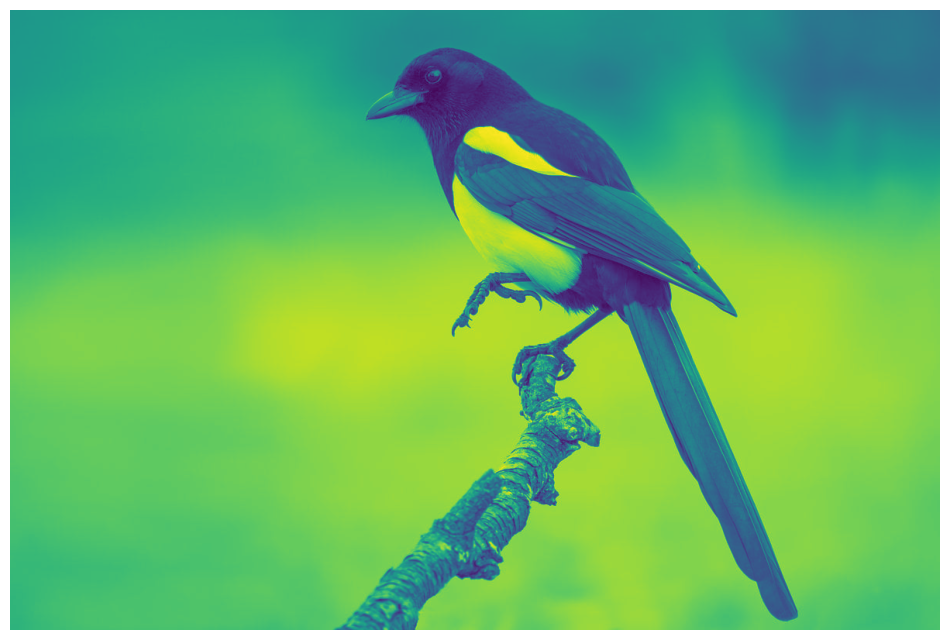

In [36]:
#@title Loading and downloading the image { display-mode: "form" }
img_url = "https://m.smedata.sk/api-media/media/image/sme/8/37/3782108/3782108_1200x.jpeg?rev=3"
def display(im, save = None):
    plt.figure(figsize=[12,12], frameon = False)
    plt.imshow(im)
    plt.axis("off")
    if save is not None:
      plt.savefig(f"{save}.png")
    plt.show()


res = requests.get(img_url)
bio = BytesIO(res.content)

img = Image.open(bio)

# img = img.resize((512, 512))

img_gs = img.convert("L")
img_array_gs = (np.array(img_gs) / 255.0).astype(np.float32)
display(img_array_gs)

Using `np.linalg.svd` we perform the singular value decomposition of the `img_array_gs` matrix, which stores the image.

In [37]:
U, D, V = np.linalg.svd(img_array_gs, full_matrices=False)

We can print the dimensions of the decomposed matrices.

In [38]:
print(f"Shape of U: {U.shape}, shape of D: {D.shape}, shape of V:{V.shape}")

Shape of U: (800, 800), shape of D: (800,), shape of V:(800, 1200)


Now, to **reconstruct the image**, we can use only a **subset of the dimensions** of the matrices $U$, $D$, and $V$.  

Instead of using the full decomposition, we approximate the image by keeping only the first $k$ singular values and corresponding singular vectors.  

This can be expressed as:

$$
A_k = U_{1:k} D_{1:k,1:k} (V_{1:k})^T
$$

where:  
- $U_{1:k}$ contains the **first $k$ columns** of $U$,  
- $D_{1:k,1:k}$ contains the **first $k$ singular values** on its diagonal, and  
- $V_{1:k}$ contains the **first $k$ columns** of $V$.

For example, using $k = 6$ we can reconstruct an approximate version of the image. This produces a **low-rank approximation** of the original image, preserving most of its structure while using fewer dimensions.

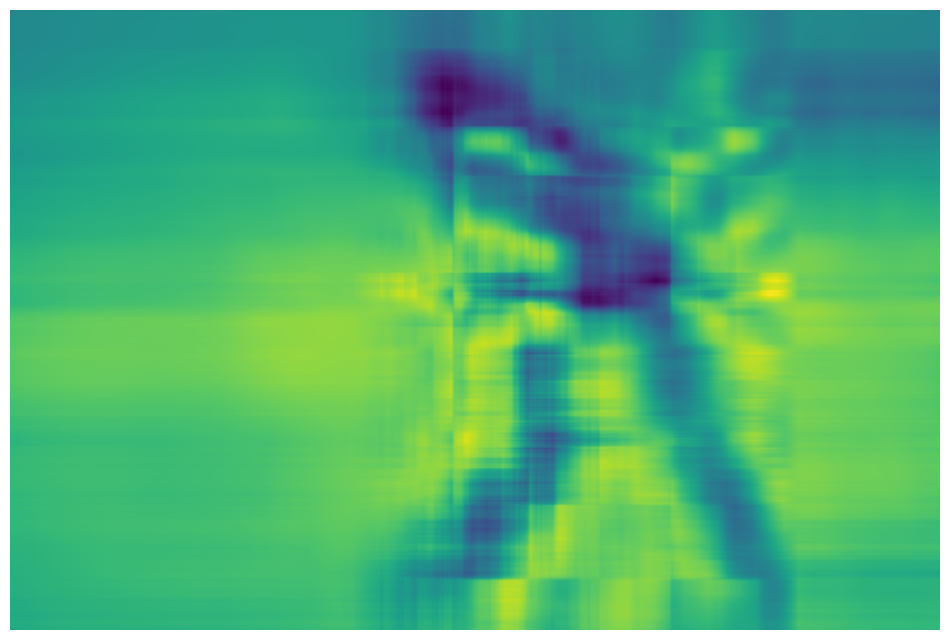

In [39]:
k = 6
reconst_img = U[:, :k] @ np.diag(D[:k]) @ V[:k, :]
display(reconst_img)

Try to plot the image with better details, using larger values of $k$.

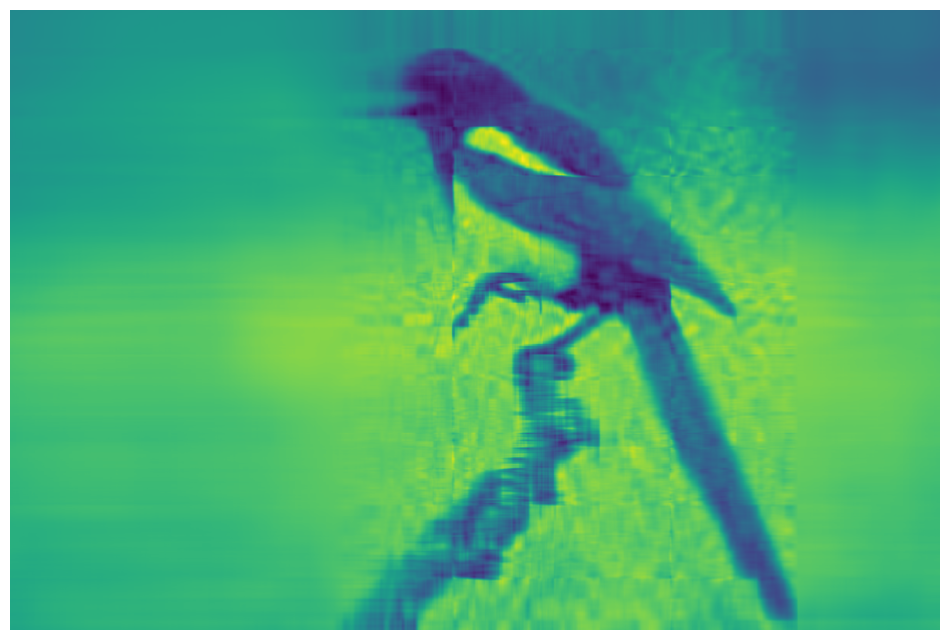

In [42]:
k =  20
reconst_img =  U[:, :k] @ np.diag(D[:k]) @ V[:k, :]
display(reconst_img)

# Linear regresssion
These exercises focus on **linear regression**, where we explore several approaches to estimating its coefficients.

## Housing Stock Data

We will perform linear regression on the [Real Estate](https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction?resource=download) dataset from Kaggle.

In this task, we aim to find the **coefficients of the linear relationship** between the housing prices (the **response vector** $ \boldsymbol{y} $) and the remaining columns, which serve as **features**.  

The relationship can be written as:

$$
\hat{\boldsymbol{y}} = X \boldsymbol{\beta}
$$

where:  
- $\hat{\boldsymbol{y}}$ is the **estimated response**,  
- $X$ is the **feature matrix**, and  
- $\boldsymbol{\beta}$ is the **vector of regression coefficients**.


In [43]:
# data for regression
url = 'https://drive.google.com/uc?id=1lZMjd7v2sbtI91i_In5cm4-5LhX4e1IW'
real_estate_df = pd.read_csv(url, header=0,index_col=0)

real_estate_df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6


Next, we will extract from the dataset the **input matrix** $X$ and the **response vector** $ \boldsymbol{y} $.  
We will also add a **vector of ones** to the data to include the **intercept term** in the regression model.

**Hint:**  
- Use the pandas `.iloc[]` function to extract columns by their indices.  
- Use `.to_numpy()` to convert the extracted data into a NumPy array.  
- To add a column of ones to $X$, first create an $n \times 1$ vector of ones using `np.ones`.  
- Then, use `np.hstack` to horizontally concatenate this vector to the $X$ matrix.

This prepares the feature matrix $X$ (with an added intercept column) and the response vector $\boldsymbol{y}$ for regression analysis.

In [ ]:
import pandas as pd

X = pd.DataFrame(real_estate_df).iloc[:,:-1].to_numpy()
y = pd.DataFrame(real_estate_df).iloc[:,-1].to_numpy()

n = X.shape[0]
ones = np.ones((n,1))
X = np.hstack((ones,X))

print(f"X has {X.shape[0]} rows and {X.shape[1]} columns")

X has 414 rows and 7 columns
[ 37.9  42.2  47.3  54.8  43.1  32.1  40.3  46.7  18.8  22.1  41.4  58.1
  39.3  23.8  34.3  50.5  70.1  37.4  42.3  47.7  29.3  51.6  24.6  47.9
  38.8  27.   56.2  33.6  47.   57.1  22.1  25.   34.2  49.3  55.1  27.3
  22.9  25.3  47.7  46.2  15.9  18.2  34.7  34.1  53.9  38.3  42.   61.5
  13.4  13.2  44.2  20.7  27.   38.9  51.7  13.7  41.9  53.5  22.6  42.4
  21.3  63.2  27.7  55.   25.3  44.3  50.7  56.8  36.2  42.   59.   40.8
  36.3  20.   54.4  29.5  36.8  25.6  29.8  26.5  40.3  36.8  48.1  17.7
  43.7  50.8  27.   18.3  48.   25.3  45.4  43.2  21.8  16.1  41.   51.8
  59.5  34.6  51.   62.2  38.2  32.9  54.4  45.7  30.5  71.   47.1  26.6
  34.1  28.4  51.6  39.4  23.1   7.6  53.3  46.4  12.2  13.   30.6  59.6
  31.3  48.   32.5  45.5  57.4  48.6  62.9  55.   60.7  41.   37.5  30.7
  37.5  39.5  42.2  20.8  46.8  47.4  43.5  42.5  51.4  28.9  37.5  40.1
  28.4  45.5  52.2  43.2  45.1  39.7  48.5  44.7  28.9  40.9  20.7  15.6
  18.3  35.6  39.4  37

## Finding pseudoinverse via SVD

A solution of a set of linear equations $A\boldsymbol{x}=\boldsymbol{b}$ via pseudoinverse is:

$$
\boldsymbol{x}=A^{\dagger}\boldsymbol{b}.
$$

One way to find the pseudoinverse is to decompose $A$ by SVD and solve the set of equations using matrix inverses:

$$
U \Sigma V^T \boldsymbol{x} = \boldsymbol{b}.
$$

Using the equation above, find the pseudoinverse $A^{\dagger}\boldsymbol{b}$.  
Consider orthogonal matrices and the simplification of the inverse of a diagonal matrix.


In [ ]:
#def pseudoInverse(A, b):
#    U, D, Vt = np.linalg.svd(A)
#    m, n = A.shape
#    S = np.zeros((n, m), dtype=float)
#    D_inv = [1/x if x != 0 else 0 for x in D]
#    np.fill_diagonal(S, D_inv)
#    
#    return (Vt.T @ S @ U.T) @ b

#print(pseudoInverse(X,y))

U, Sigma, Vt = np.linalg.svd(X, full_matrices= False)


[-1.44371008e+04  5.14622746e+00 -2.69695448e-01 -4.48746107e-03
  1.13327690e+00  2.25472976e+02 -1.24236012e+01]


## Least squares


In the slides, you can find equations, called normal equations, to estimate values of regression coefficients using least squares. Estimate these coefficients using the provided data and then print the coefficients.

In [ ]:
beta = # code here

Estimate $\hat{\boldsymbol{y}}$ using the obtained regression coefficients.  
Then, compute the **residuals** as the difference between the estimated and the real values.
Display a **histogram** of the residuals.

In [ ]:
# print the regression coefficients here
residuals = # compute residuals here
plt.hist(residuals)
plt.show()

# Back to Gram-Schmidt
Another way to estimate regression coefficients is to use the **Gram–Schmidt** algorithm and the **QR factorization** of the feature matrix $X$:
$$X = Q R,$$
where $Q$ has orthonormal columns and $R$ is upper triangular.

In [ ]:
def gram_schmidt_orto(A):
    n, m = A.shape # get the shape of A
    Q = np.empty((n, m), dtype = np.float64) # initialize matrix Q
    for i in range(m):
      q = A[:, i]
      for j in range(i):
        q = q - (Q[:, j].T @ A[:,i]) * Q[:, j]
      if np.linalg.norm(q) == 0:
        raise Exception("Linearly dependent vector")
      Q[:, i] = q / np.linalg.norm(q)
    return Q

In the next step, we will **decompose** the matrix $A$ into matrices $Q$ and $R$, such that:

$$
A = Q R.
$$

The element $R_{ij}$ of the matrix $R$ is obtained as:

$$
R_{ij} = \boldsymbol{q}_i^T \boldsymbol{a}_j, \quad \text{for } i < j,
$$

and

$$
R_{ii} = \lVert \tilde{\boldsymbol{q}}_i \rVert.
$$

Because we only define $R_{ij}$ for $i \leq j$, the matrix $R$ is **upper triangular**.  
From the slides, you know that $Q$ is obtained by the **Gram–Schmidt algorithm**, and the equation for obtaining $R$ is also given there. 😉

---

Below, add code to compute the matrix $R$ by passing the **Gram–Schmidt function** as the value of `GS_alg`.


In [ ]:
def QR_factorization(A, Q=None, GS_alg = None):
    n, m = A.shape
    if Q is None:
      Q = # Gram-Schmidt by GS_alg function
    R = # add code to obtain R
    return Q, R


Now, compare the matrices obtained from your **Gram-Schmidt factorization** with the results of **NumPy's built-in QR factorization**.  

Remember — the matrix $R$ must be **upper triangular**!

In [ ]:
A = np.array([[3, 2 ,4, 2],[0, 3, 5, 6],[3, 5, 9, 10],[1, 3, 4, 3]])

Q,R = # your QR
print(f"{np.round(Q,5)}\n")
print(np.round(R,5))

Q_np, R_np = np.linalg.qr(A)
print("\nNumpy solution:")
print(np.round(Q_np,5))
print(np.round(R_np,5))

To solve a set of equations using **QR decomposition**, we need a function for **back substitution**.  
Given an upper triangular matrix $R$ and a vector $\boldsymbol{b}$, we solve:

$$
R \boldsymbol{x} = \boldsymbol{b}.
$$

Since $R$ is upper triangular, we start solving from the last equation (bottom row) and move upwards.


Two cells below, you can find a simple example to verify your code.

In [ ]:
def backsubstitution(A, b):
  x = np.zeros(A.shape[0]) # vector of solutions
  # add the code for backsubstitution
  return x

Verify your backsubstitution on the following set of equations:

$3x_1 + 2x_2 + 4x_3 + 2x_4 = 49$

$3x_2 + 5x_3 + 6x_4 = 40$

$2x_3 + 4x_4 = 16$

$3x_4 = 9$

In [ ]:
A = np.array([[3, 2 ,4, 2],[0, 3, 5, 6],[0, 0, 2, 4],[0, 0, 0, 3]], dtype = np.float32)
b = np.array([49, 40, 16, 9], dtype = np.float32)
print(A)

### Combining backsubstitution and QR factorization to solve the regression problem

First, take a look at Algorithm 11.2 at p. 208 of the VMLS book. It shows you how to combine backsubstitution with QR factorisation to solve set of equations $Ax = b$.

Combine Gram-Schmidt ortogonalization, QR factorisation and backsubstitution together, to obtain the regression coefficients for housing prices dataset. Are the coefficients it the same as you obtained before?

# Predicting house prices based on new data
As we have obtained the coefficients, we are ready to do some predictions! Use the data defined below and the coefficients you obtained to get some predictions of the house prices. After obtaining the predictions, measure the prediction error, for example using RMS from the slides, or just take mean value of the absolute error of residuals.

In [ ]:
predictions_url = 'https://drive.google.com/uc?id=1dwH8owC3JDSH8jPcAOMotPuvY2fKsB2T'
predictions_df = pd.read_csv(predictions_url, header=0, index_col=0)
X2 = predictions_df.iloc[:,:-1].to_numpy()
y2 = predictions_df.iloc[:,-1].to_numpy()